# Song classification and recommendation

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df_train = pd.read_csv("../data/raw/spotify_dataset_train.csv")
df_test = pd.read_csv("../data/raw/spotify_dataset_test.csv")
df_train.shape

(25492, 17)

## General info

In [53]:
df_train_copy = df_train.copy()
df_train_copy.info()# attention mode est aussi boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25492 entries, 0 to 25491
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      25492 non-null  object 
 1   explicit          25492 non-null  bool   
 2   popularity        25492 non-null  int64  
 3   danceability      25492 non-null  float64
 4   energy            25492 non-null  float64
 5   key               25492 non-null  int64  
 6   loudness          25492 non-null  float64
 7   mode              25492 non-null  int64  
 8   speechiness       25492 non-null  float64
 9   acousticness      25492 non-null  float64
 10  instrumentalness  25492 non-null  float64
 11  liveness          25492 non-null  float64
 12  valence           25492 non-null  float64
 13  tempo             25492 non-null  float64
 14  duration_ms       25492 non-null  int64  
 15  time_signature    25492 non-null  int64  
 16  genre             25492 non-null  object

In [54]:
df_train_copy.shape

(25492, 17)

In [55]:
df_train_copy['genre'].value_counts()

genre
pop          5181
rock         3695
hip hop      2926
rap          1654
edm          1593
jazz         1516
dance        1371
electro      1081
country      1042
punk          994
metal         578
soul          505
chanson       489
classical     393
latin         378
folk          372
disco         355
r&b           352
reggae        281
techno        265
blues         246
salsa         225
Name: count, dtype: int64

In [56]:
df_train_copy.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015-06-23,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,country
1,2021-11-12,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,classical
2,2013-06-21,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,rap
3,2012-09-04,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,blues
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,dance


## Stats

In [57]:
df_train_copy.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,2.549200e+04,25492.000000
mean,31.185784,0.600785,0.666671,5.319630,-7.827989,0.617841,0.098590,0.247458,0.121762,0.194426,0.517368,122.020427,2.357300e+05,3.949004
std,26.647985,0.167052,0.223217,3.577066,4.190793,0.485925,0.100955,0.298900,0.264749,0.160047,0.252768,28.000996,9.605836e+04,0.313024
min,0.000000,0.000000,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.008290,0.000000,0.000000,1.344000e+04,0.000000
25%,0.000000,0.494000,0.526000,2.000000,-9.618250,0.000000,0.038000,0.012900,0.000000,0.093475,0.318000,99.996000,1.833298e+05,4.000000
50%,33.000000,0.613000,0.700000,5.000000,-6.944500,1.000000,0.054400,0.098400,0.000099,0.129000,0.518000,123.130000,2.179200e+05,4.000000
75%,54.000000,0.723000,0.846000,8.000000,-5.047750,1.000000,0.111000,0.415000,0.031700,0.254000,0.721000,139.936000,2.656698e+05,4.000000
max,98.000000,0.988000,1.000000,11.000000,1.869000,1.000000,0.934000,0.996000,0.989000,0.988000,0.988000,244.613000,2.516987e+06,5.000000


In [58]:
df_train_copy['popularity'].value_counts()#manque valeurs ou non 
#28% des donnees sont a 0 popularity  

popularity
0     7167
53     366
51     349
47     338
1      336
      ... 
94       4
97       2
96       1
98       1
95       1
Name: count, Length: 99, dtype: int64

In [59]:
df_train_copy.isna().sum()

release_date        0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [60]:
df_train_copy.nunique()

release_date         5597
explicit                2
popularity             99
danceability          917
energy               1265
key                    12
loudness            11339
mode                    2
speechiness          1279
acousticness         3890
instrumentalness     4746
liveness             1605
valence              1416
tempo               19155
duration_ms         18616
time_signature          5
genre                  22
dtype: int64

In [61]:
#preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class MusicFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_date_ = None

    def fit(self, X, y=None):
        dates = pd.to_datetime(X['release_date'], format='mixed')
        self.min_date_ = dates.min()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['release_date'] = pd.to_datetime(X_copy['release_date'], format='mixed')
        X_copy['days_since_1900'] = (X_copy['release_date'] - self.min_date_).dt.days

        if 'explicit' in X_copy.columns:
            X_copy['explicit'] = X_copy['explicit'].astype(int)
       
        cols_to_drop = ['release_date']
        X_copy = X_copy.drop(columns=[c for c in cols_to_drop if c in X_copy.columns])
        
        return X_copy

X = df_train.drop(columns=['genre'])
y = df_train['genre']

pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])

label_encoder_y = LabelEncoder()

X_processed = pipeline_X.fit_transform(X)
y_encoded = label_encoder_y.fit_transform(y)


In [62]:
print(X_processed.head(),y_encoded[:5])

   explicit  popularity  danceability  energy  key  loudness  mode  \
0         0          38         0.509  0.8720    2    -5.170     1   
1         0          58         0.182  0.0377   11   -33.748     0   
2         0          36         0.550  0.9410    0    -3.128     0   
3         0           0         0.569  0.7190    6    -8.399     0   
4         0           0         0.631  0.6610    8    -5.694     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0547        0.0396          0.000015    0.3310   0.4860   95.969   
1       0.0391        0.9870          0.957000    0.0804   0.0923  100.482   
2       0.0849        0.0182          0.003750    0.3120   0.3510  145.006   
3       0.0663        0.8670          0.941000    0.1760   0.6430  145.118   
4       0.0558        0.0146          0.720000    0.3650   0.3300  130.004   

   duration_ms  time_signature  days_since_1900  
0       194375               4            42176  
1       24

C:\Users\barta\AppData\Local\Temp\ipykernel_21044\727536109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')


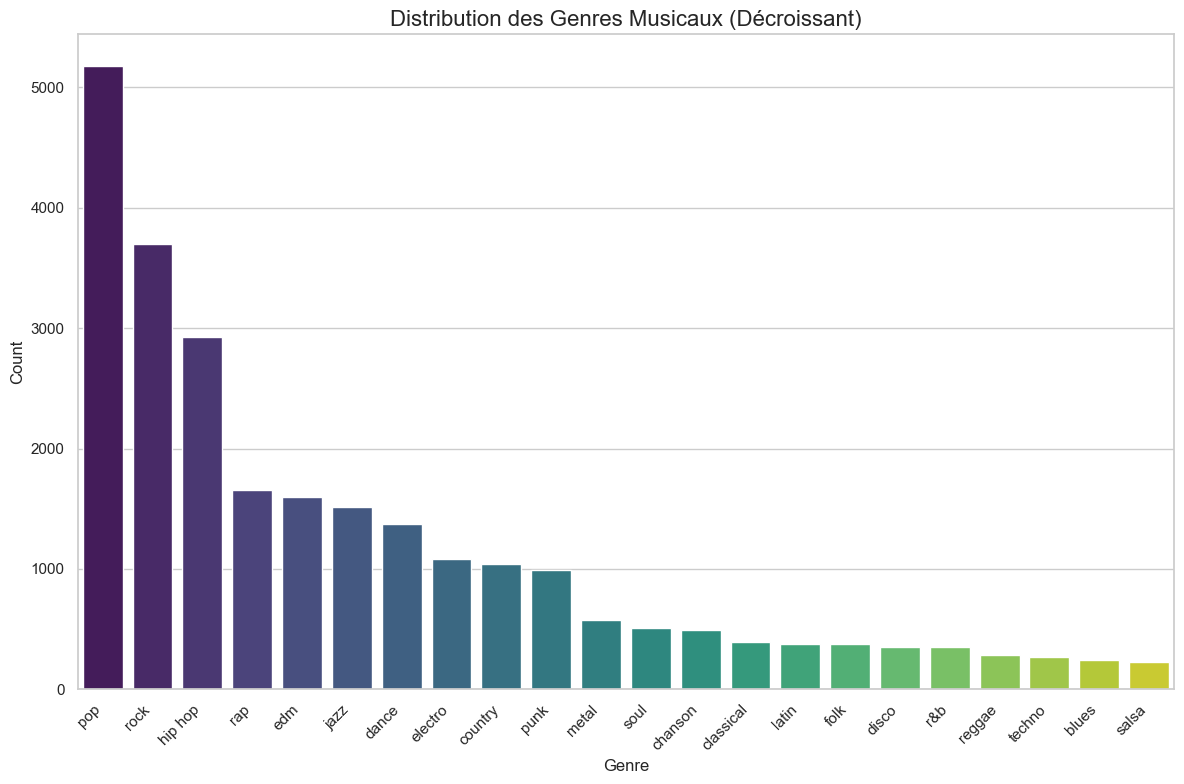

In [63]:

df_counts = df_train['genre'].value_counts().reset_index()
df_counts.columns = ['Genre', 'Count']

# Configuration et tracé
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')

plt.title('Distribution des Genres Musicaux (Décroissant)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

les classes sont déséquilibrées aevc une sureprésentation du pop rock et hip hop 

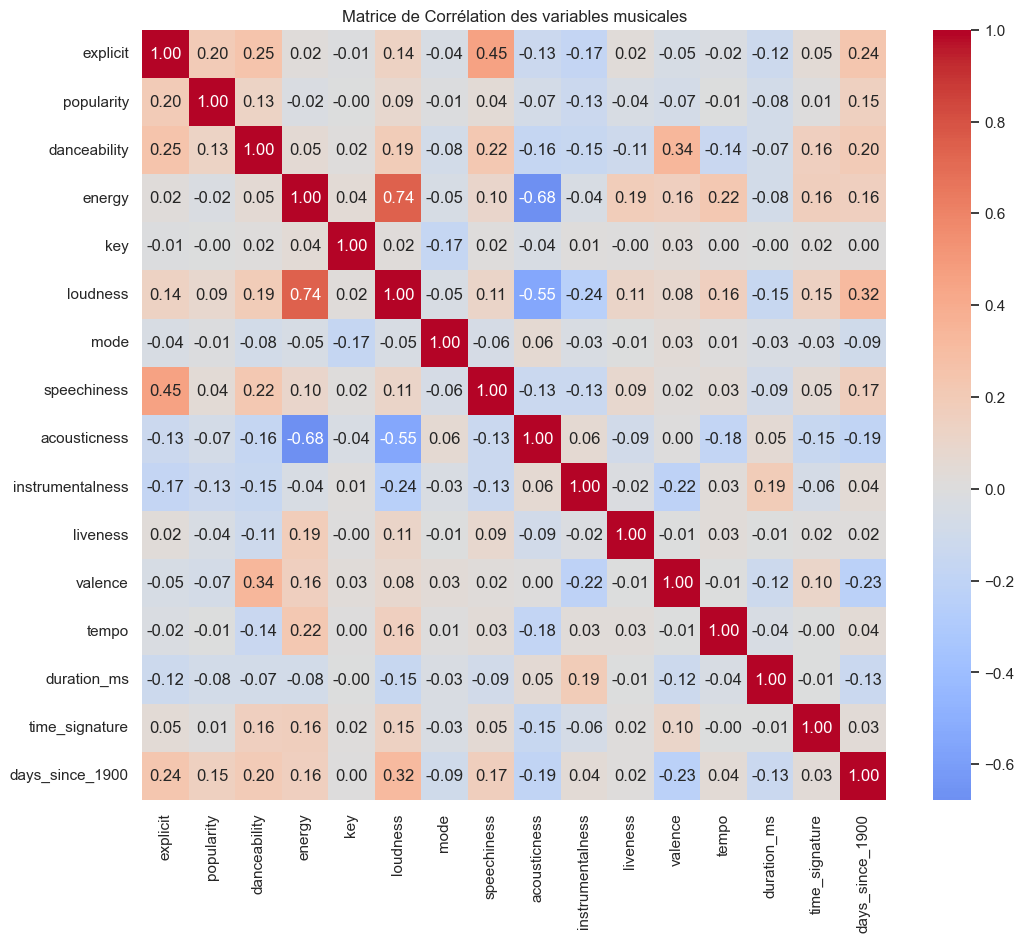

In [64]:
plt.figure(figsize=(12, 10))

sns.heatmap(X_processed.corr(), 
            annot=True,      
            fmt=".2f",      
            cmap='coolwarm', 
            center=0)       

plt.title("Matrice de Corrélation des variables musicales")
plt.show()

#### Il semble que parmis toutes les musiques il y a une forte relation entre loudness et energy, speachiness et explicit, mais corrélation négative entre energy et accousticness et loudness et accousticness. Les features key, mode semblent peu corrélées aux autres.

In [65]:
#tsne 
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_processed)

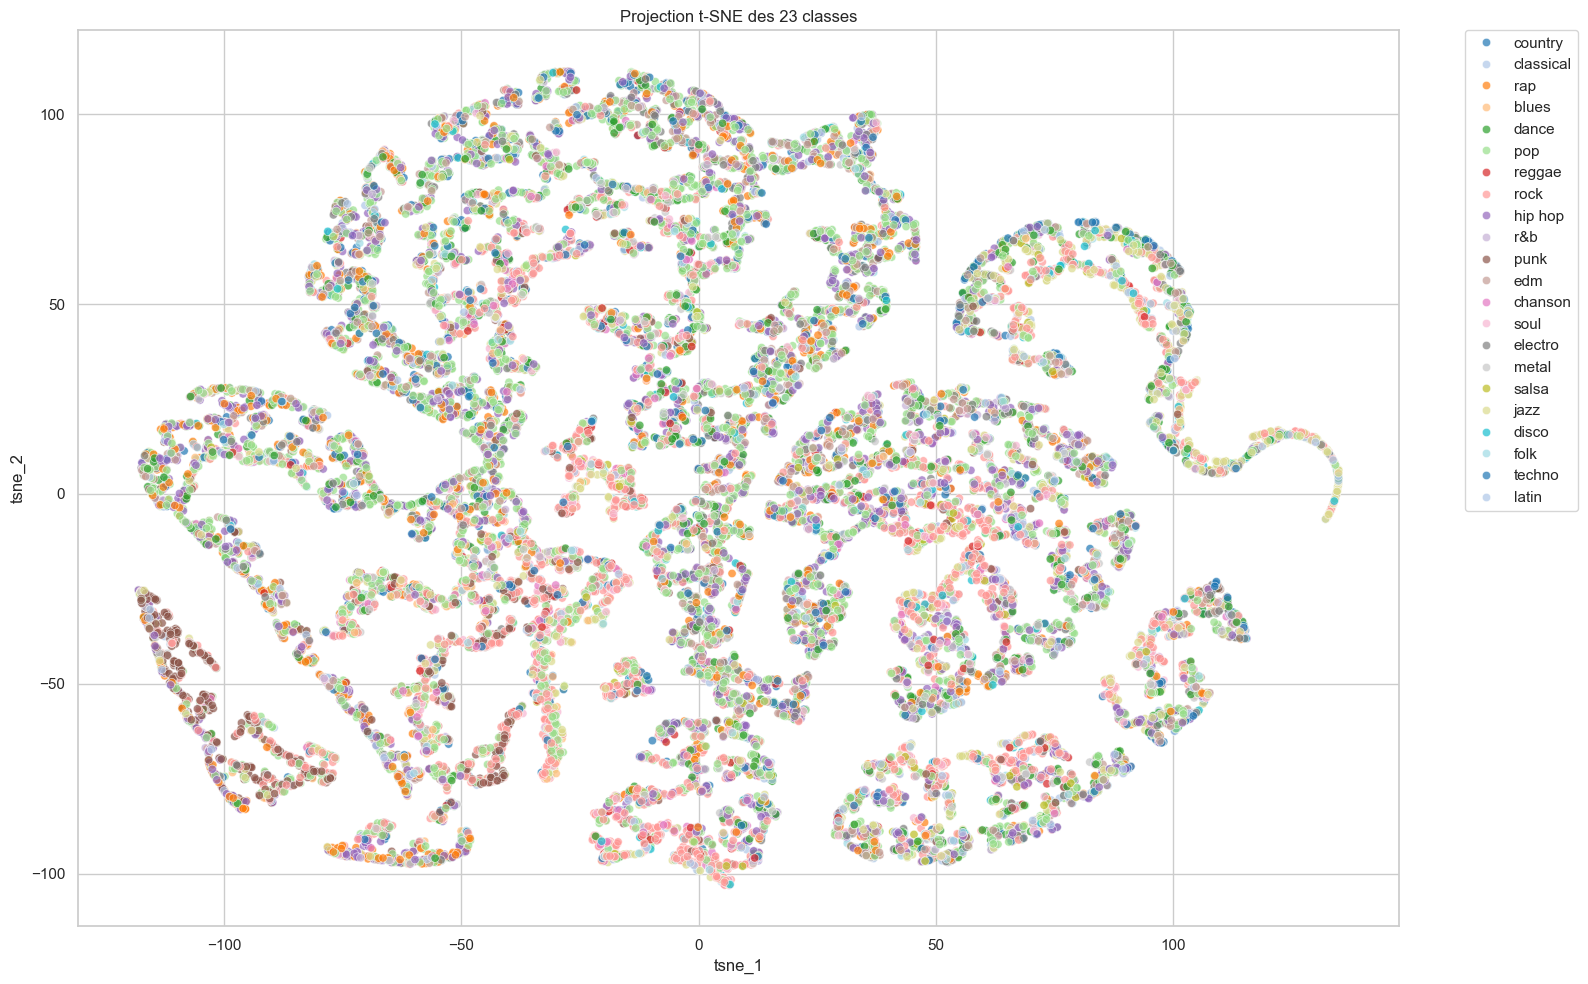

In [66]:
import seaborn as sns
import pandas as pd

# On crée un petit DataFrame temporaire pour faciliter le plot
tsne_df = pd.DataFrame({
    'tsne_1': X_embedded[:, 0],
    'tsne_2': X_embedded[:, 1],
    'label': y  # Assurez-vous que y a les noms des genres, pas juste des chiffres, pour la légende
})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='label',           # Couleur par classe
    palette='tab20',       # Palette distincte
    data=tsne_df,
    legend="full",         # Affiche toutes les classes
    alpha=0.7
)

plt.title('Projection t-SNE des 23 classes')
# On déplace la légende à l'extérieur pour ne pas cacher les points
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

1. Le Diagnostic Général : "Le Continent Unique"
Tu n'as pas obtenu des îlots bien séparés (comme l'archipel d'Hawaii), mais un gros continent massif avec quelques péninsules.

Ce que ça veut dire : Tes classes ne sont pas linéairement séparables avec tes features actuelles.

La réalité musicale : C'est logique ! La frontière entre "Pop", "Dance" et "Electro" est floue. Idem entre "Rock", "Punk" et "Metal". Un morceau peut avoir l'énergie du Metal mais la structure de la Pop. Tes features (tempo, énergie, danceability) se chevauchent énormément entre ces genres.

2. Les "Dissidents" (Les zones isolées)
Regarde attentivement les bordures de ton graphe :

À gauche (zone marron/bordeaux) : Il y a un groupe qui tente de faire sécession.

Hypothèse : C'est probablement le Classique ou le Folk/Acoustique. Ce sont des genres qui ont des signatures très différentes (pas de batterie, beaucoup de silence, acoustique forte). Le modèle arrivera très bien à les classer.

En bas à gauche (zone orange/rouge) : Une autre péninsule distincte.

Hypothèse : Probablement le Rap ou Hip-Hop. La variable speechiness (parlé) est un marqueur très fort qui isole ces morceaux du reste.

3. La "Zone de Confusion" (Le grand mélange à droite)
La grande masse à droite est un mélange de vert, rose, bleu clair...

Les suspects : Pop, Dance, EDM, Disco, Electro, Latin.

Le problème : Ces genres partagent souvent le même tempo (120-130 BPM), la même énergie haute et la même métrique (4/4).

Conséquence pour ton modèle : C'est là que ton modèle va faire le plus d'erreurs. Il va souvent confondre "Pop" avec "Dance".

4. L'importance des gradients
On voit que les couleurs ne sont pas aléatoires, elles forment des gradients. On passe doucement du bleu au vert au rouge.